In [13]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import (
    plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_qsphere)
import numpy as np

#To draw the cirquit in a fancy way you need to install pylatexenc

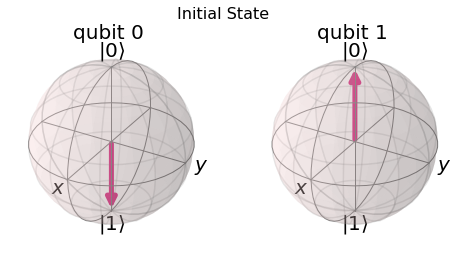

In [14]:
"CONSTRUCTING BELL STATES: HADAMARD AND CNOT GATES"

# Use Aer simulator
simulator = Aer.get_backend('statevector_simulator')
#simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the |q> = |q0> x |q1> register (2 qubits)
circuit = QuantumCircuit(2, 2)

#Initializing the first qubit (q0) at |1> = [0,1] or |0> = [1,0]
circuit.initialize([0,1], 0)

#Initializing the first qubit (q1) at |1> = [0,1] or |0> = [1,0]
circuit.initialize([1,0], 1)
#circuit.initialize([np.cos(np.pi/4),np.sin(np.pi/4)], 1)

#Getting initial state
start = execute(circuit,simulator)
start_state = start.result()
start_vector = start_state.get_statevector() # Column complex vector
plot_bloch_multivector(start_vector, title="Initial State")

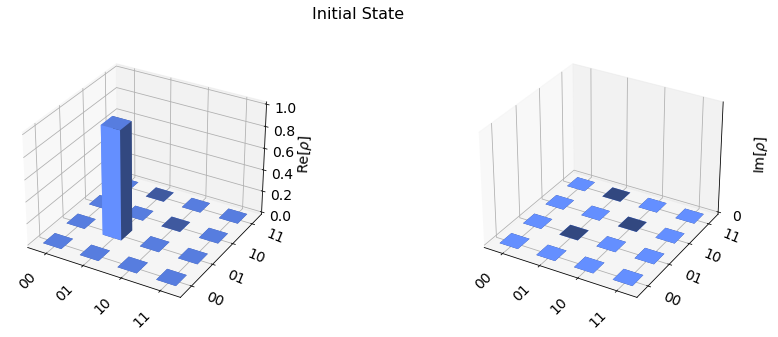

In [15]:
# Quantum tomography (density matrix of |q0q1>)
plot_state_city(start_vector, title = 'Initial State')

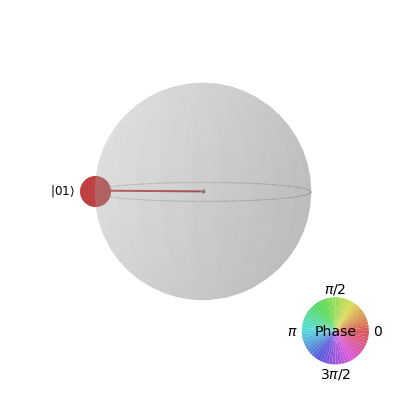

In [16]:
# Representation on the Q-esphere
#plot_state_qsphere(start_vector, show_state_labels = True , show_state_phases = True, use_degrees = False)
plot_state_qsphere(start_vector)

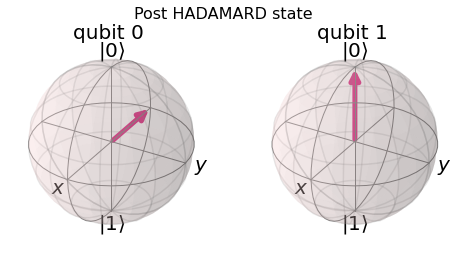

In [17]:
# Add a H gate on qubit 0
circuit.h(0)

#Getting post Hadamard state
had = execute(circuit,simulator)
had_state = had.result()
had_vector = had_state.get_statevector() # Column complex vector
plot_bloch_multivector(had_vector, title = "Post HADAMARD state")

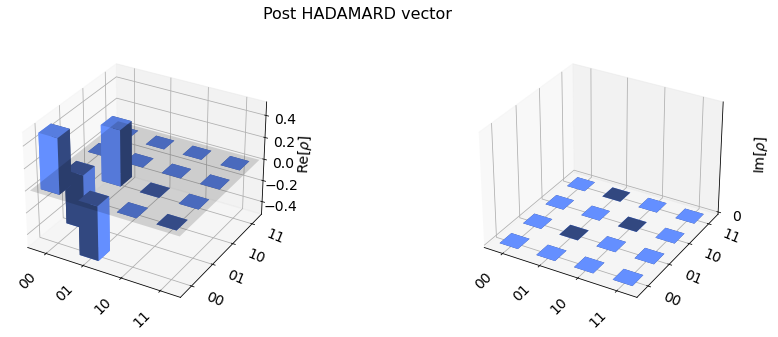

In [18]:
# Quantum tomography (density matrix of |q0q1>)
plot_state_city(had_vector, title="Post HADAMARD vector")

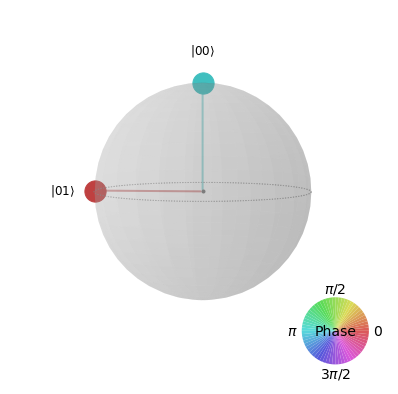

In [19]:
# Representation on the Q-esphere
#plot_state_qsphere(had_vector, show_state_labels = True , show_state_phases = True, use_degrees = False)
plot_state_qsphere(had_vector)

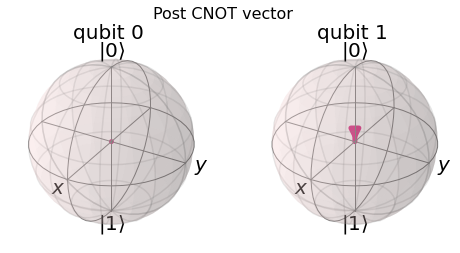

In [20]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

#Getting post Hadamard state
cnot = execute(circuit,simulator)
cnot_state = cnot.result()
cnot_vector = cnot_state.get_statevector() # Column complex vector
plot_bloch_multivector(cnot_vector, title="Post CNOT vector")

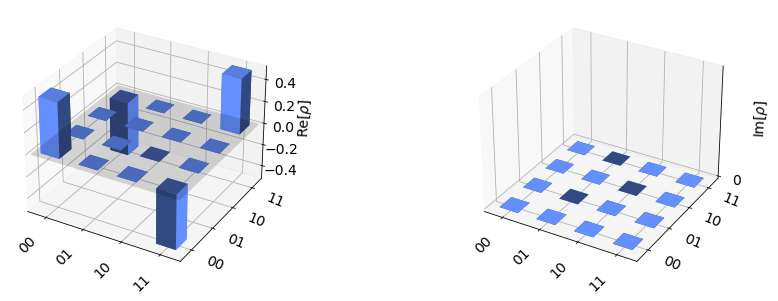

In [21]:
# Quantum tomography (density matrix of |q0q1>)
plot_state_city(cnot_vector)

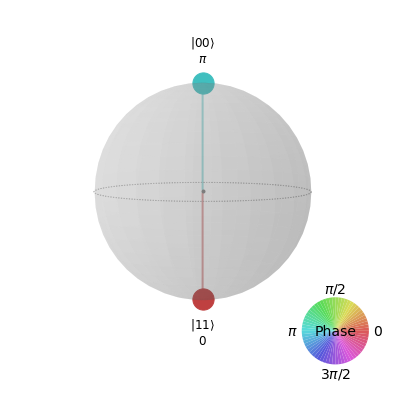

In [22]:
# Representation on the Q-esphere
plot_state_qsphere(cnot_vector, show_state_labels = True , show_state_phases = True, use_degrees = False)


Total count for 00 and 11 are: {'00': 504, '11': 496}


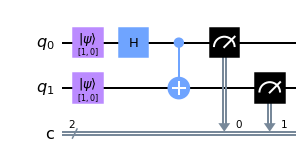

In [23]:
# Use Aer simulator
#simulator = Aer.get_backend('statevector_simulator')
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the |q> = |q0> x |q1> register (2 qubits)
circuit = QuantumCircuit(2, 2)

#Initializing the first qubit (q0) at |1> = [0,1] or |0> = [1,0]
circuit.initialize([1,0], 0)

#Initializing the first qubit (q1) at |1> = [0,1] or |0> = [1,0]
circuit.initialize([1,0], 1)

# Re-execute circuit with the new simulator
circuit.h(0) # Hadamard acting on |q0>
circuit.cx(0, 1) # CNOT acting on |q1> controlled by |q0>

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)
# shots > 1 is for 'qasm_simulator'
# 'statevector_simulator' always make 1 shot

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw('mpl')